# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> This report aim to investigate why patients miss their scheduled medical appointments in Brazil. In this report, we will look at the various characteristics such as age, gender, location and individual's primary health designation(s) and determine if these characteristics contribute to the reason why patients missed their scheduled medical appointments.


> Questions for analysis:
<ul>
    <li>What are the percentage of no-shows versus shows in the dataset?</li>
    <li>Does age play a role in shows versus no-shows for scheduled medical appointments?</li>
    <li>Does gender play a role in shows versus no-shows for scheduled medical appointments?</li>
    <li>Which city have the highest number of no-shows versus shows for scheduled medical appointments?</li>
    <li>What are the breakdown of patients that received SMS reminders showing up for their scheduled appointments versus patients that do not received SMS reminder?</li>

    
</ul>

> Importing data analysis packages. 

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [208]:
df = pd.read_csv('noshow.csv')

>Printing the first line to get a snapshot of the headings.

In [64]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Printing info statement to get the number of rows and columns, the data type of each column, and identify the number of missing values for each column(if any).

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Printing duplicated statement to find any duplicates in the dataset.

In [66]:
df.duplicated().sum()

0

> Printing describe statement to get statisctical snapshot of the dataset.

In [67]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

#### Data Observations

> From the above, we can see that:

<ul>
    <li> There are few spelling mistakes and naming inconsistencies in the headings.</li> 
    <li> There are 110,527 rows and 14 columns of data.</li>
    <li> There are no missing values in the dataset.</li>
    <li> There are few inconsistency in the datatypes.</li>
    <li> There are no duplicates in the dataset. </li>
    <li> The are few outliers in the dataset. </li>
</ul>
    
#### Data Changes

<ol>
    <li> 1. Fix the three spelling mistakes: Hipertension, PatientId and Handcap.</li>
    <li> 2. Fix few datatypes in the dataset - patientID: Change datatypes from float to int, schedule_day: Strip timestamp from datatypes, appointment_day: Strip timestamp from datatypes. </li>
    <li> 3. Remove outliers in age. </li>
    
</ol>
    


> Step 1: Fix spelling mistakes and naming inconsistencies.

In [212]:
df.rename(columns={'PatientID':'Patient_ID','AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','PatientId':'PatientID','Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'No_Show'}, inplace=True)
df.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Step 2: Fix datatypes in the dataset - patientID: Change datatypes from float to int.

In [213]:
df['Patient_ID'] = df['Patient_ID'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID         110527 non-null int64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


> Step 3: Converting Scheduled_Day datatype from string to datetime to easily perform time calculations

In [214]:
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID         110527 non-null int64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null datetime64[ns]
Appointment_Day    110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 11.8+ MB


> Step 4: Strip timestamp from Scheduled_Day datatype.

In [215]:
df['Scheduled_Day'] = df['Scheduled_Day'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID         110527 non-null int64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


> Step 5: Converting Appointment_Day datatype from string to datetime to easily perform time calculations.

In [216]:
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_ID         110527 non-null int64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 11.8+ MB


> Step 6: Strip timestamp from Appointment_Day datatype.

In [217]:
df['WeekDay'] = pd.to_datetime(df['Appointment_Day']).apply(lambda x: x.isoweekday())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
Patient_ID         110527 non-null int64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
WeekDay            110527 non-null int64
dtypes: datetime64[ns](1), int64(10), object(4)
memory usage: 12.6+ MB


> Step 6: Converting date fields from string to datetime, once again, to enable datetime functions, then converting date to day of week for report readability.

In [218]:
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df['Scheduled_DOW'] = df['Scheduled_Day'].dt.weekday_name
df['Appointment_DOW'] = df['Appointment_Day'].dt.weekday_name
df.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,WeekDay,Scheduled_DOW,Appointment_DOW
0,29900000000000,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,5,Friday,Friday


> Step 7: Remove outliers in age.

In [219]:
df[df['Age'] == -1].count()['Age']

1

> Find out location of outliers.

In [220]:
df.loc[df['Age'] == -1]

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,WeekDay,Scheduled_DOW,Appointment_DOW
99832,466000000000000,5775010,F,2016-06-06,2016-06-06,-1,ROMÌÄO,0,0,0,0,0,0,No,1,Monday,Monday


> Drop -1 data.

In [221]:
df.drop(index=99832, inplace=True)

> Verify the data have been dropped.

In [222]:
np.sort(df['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

> Convert No-show datatype from string to int, yes to 1 and no to 0.

In [223]:
df["No_Show"] = np.where((df.No_Show=="Yes"), 1, 0)
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,WeekDay,Scheduled_DOW,Appointment_DOW
0,29900000000000,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5,Friday,Friday
1,559000000000000,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5,Friday,Friday
2,4260000000000,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,5,Friday,Friday
3,868000000000,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5,Friday,Friday
4,8840000000000,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5,Friday,Friday


> Convert No_Show datatype from string to int.

In [224]:
df['No_Show'] = df['No_Show'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 17 columns):
Patient_ID         110526 non-null int64
Appointment_ID     110526 non-null int64
Gender             110526 non-null object
Scheduled_Day      110526 non-null datetime64[ns]
Appointment_Day    110526 non-null datetime64[ns]
Age                110526 non-null int64
Neighbourhood      110526 non-null object
Scholarship        110526 non-null int64
Hypertension       110526 non-null int64
Diabetes           110526 non-null int64
Alcoholism         110526 non-null int64
Handicap           110526 non-null int64
SMS_received       110526 non-null int64
No_Show            110526 non-null int64
WeekDay            110526 non-null int64
Scheduled_DOW      110526 non-null object
Appointment_DOW    110526 non-null object
dtypes: datetime64[ns](2), int64(11), object(4)
memory usage: 15.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What are the percentage of no-shows versus shows in the dataset?

> Count the number of shows and no shows.

In [225]:
df['No_Show'].value_counts()

0    88207
1    22319
Name: No_Show, dtype: int64

> Plot the percentage of no-shows versus shows for scheduled medical appointments.

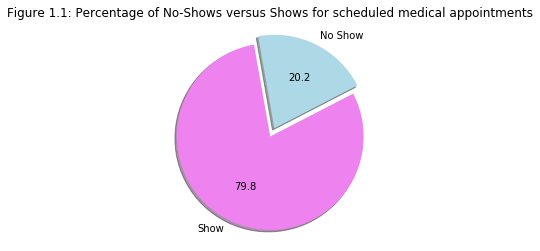

In [262]:
plt.pie([88207, 22319], labels = ['Show', 'No Show'], colors = ['violet', 'lightblue'],shadow=True, explode= [0,0.1], startangle=100, autopct='%1.1f')
plt.axis('equal')
plt.title('Figure 1.1: Percentage of No-Shows versus Shows for scheduled medical appointments');

> From figure 1.1, out of 110526 patients, 79.8% showed up for their scheduled medical appointment and 20.2% did not show up for their scheduled medical appointments.

### Research Question 2: Does age play a role in shows versus no-shows for scheduled medical appointments?

> Set bin edges to group ages, create labels, create column and verify for successful creation of new column

In [227]:
# Set bin edges
bin_edges = [0, 20, 40, 60, 80, 115]
# Create labels for each age group
bin_names = ['<20', '20-39', '40-59', '60-79', '>=80']

# Create Age_Group column
df['Age_Group'] = pd.cut(df['Age'], bin_edges, labels=bin_names, right=False, include_lowest=True)

# Check for successful creation of the column
df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,WeekDay,Scheduled_DOW,Appointment_DOW,Age_Group
0,29900000000000,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5,Friday,Friday,60-79
1,559000000000000,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5,Friday,Friday,40-59
2,4260000000000,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,5,Friday,Friday,60-79
3,868000000000,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5,Friday,Friday,<20
4,8840000000000,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5,Friday,Friday,40-59


> Count the number age groups that showed up for scheduled medical appointments and age groups that did not showed up for scheduled medical appointments.

In [228]:
# Find out the counts of no shows and shows for each age group
Age_Group_Counts = df.groupby(['Age_Group', 'No_Show']).count()['Age']
Age_Group_Counts

Age_Group  No_Show
<20        0          23670
           1           6741
20-39      0          22190
           1           6680
40-59      0          24416
           1           5656
60-79      0          15118
           1           2692
>=80       0           2811
           1            547
Name: Age, dtype: int64

> Plot distribution of age group that did not showed up for medical appointments.

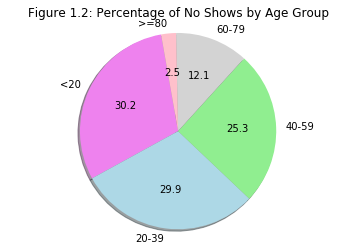

In [359]:
plt.pie([6741, 6680,5656,2692,547], labels = ['<20', '20-39', '40-59', '60-79', '>=80'], colors = ['violet', 'lightblue','lightgreen','lightgray','pink'],shadow=True, startangle=100, autopct='%1.1f')
plt.axis('equal')
plt.title('Figure 1.2: Percentage of No Shows by Age Group');

> From Figure 1.2, Age group under 40 appear to have higher rate of no show to their scheduled medical appointment compared to the other age groups. Next, we will look at patterns in patients age in relation to no show.

In [276]:
# Create variable no shows
No_Shows = df.query('No_Show == "1"')

In [278]:
# Create variabe No Shows Age for histogram plot
df_NS_Age = No_Shows['Age']

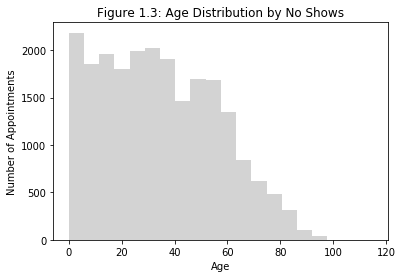

In [279]:
# Plot graph
plt.hist(df_NS_Age, stacked=True, bins=20, color='lightgray')
plt.title('Figure 1.3: Age Distribution by No Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

> From Figure 1.3, there seem to be a decreasing pattern of no shows as the age group increased.

### Research Question 3: Does gender play a role in shows versus no-shows for scheduled medical appointments?

> Count the number of Females and Males.

In [233]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

> Count the number female and male patients that did not show up and showed up for scheduled medical appointments.

In [236]:
Gender_counts = df.groupby(['Gender', 'No_Show']).count()['Age']
Gender_counts

Gender  No_Show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: Age, dtype: int64

> Plot the number of Female and Male patients that showed up for their scheduled medical appointments.

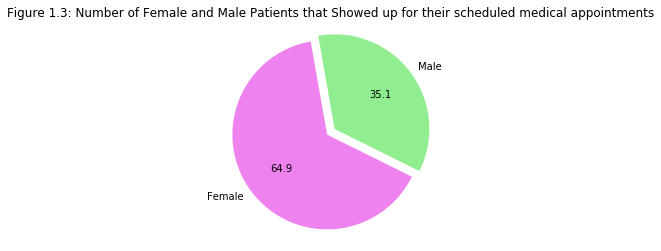

In [266]:
plt.pie([57245, 30962], labels = ['Female', 'Male'], colors = ['violet', 'lightgreen'], explode= [0,0.1], startangle=100, autopct='%1.1f')
plt.axis('equal')
plt.title('Figure 1.3: Number of Female and Male Patients that Showed up for their scheduled medical appointments');

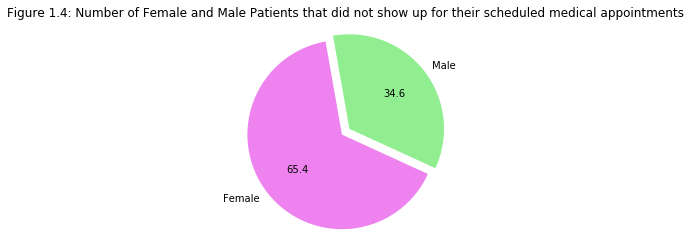

In [247]:
plt.pie([14594, 7725], labels = ['Female', 'Male'], colors = ['violet', 'lightgreen'], explode= [0,0.1], startangle=100, autopct='%1.1f')
plt.axis('equal')
plt.title('Figure 1.4: Number of Female and Male Patients that did not show up for their scheduled medical appointments');

> From Figure 1.3 and Figure 1.4 above, there are more female patients that both show up and missed their medical appointment than male patients. The result is as expected as there are more female patients count than male patients in the dataset. It would be interesting to find out the actual outcome once the total count for both gender is normalised for equal comparison.

### Research Question 4: What are the breakdown of patients that received SMS reminders showing up for their scheduled appointments versus patients that do not received SMS reminder?

In [301]:
# Count number of no shows and shows for patients that received sms versus patients that did not received sms.
SMS_Counts_NS = df.groupby(['SMS_received', 'No_Show']).count()['Age']
SMS_Counts_NS

SMS_received  No_Show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: Age, dtype: int64

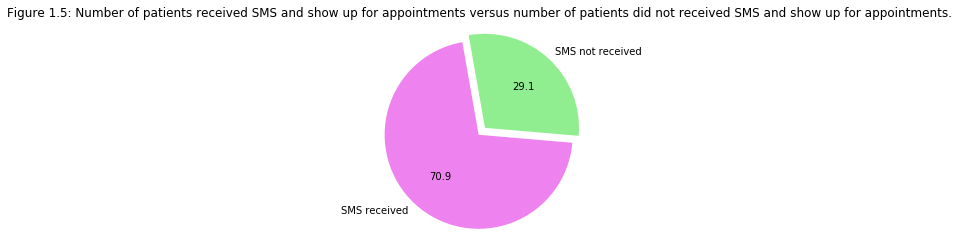

In [317]:
# Plot graph
plt.pie([62509, 25698], labels = ['SMS received', 'SMS not received'], colors = ['violet', 'lightgreen'], explode= [0,0.1], startangle=100, autopct='%1.1f')
plt.axis('equal')
plt.title('Figure 1.5: Number of patients received SMS and show up for appointments versus number of patients did not received SMS and show up for appointments. ');

> In figure 1.5, the proportion of patients that received SMS and showed up for their scheduled medical appointments are higher than the patients that did not receive SMS reminder and show up for their appointment. 

### Research Question 5: Which city have the highest number of no-shows for scheduled medical appointments?

In [338]:
# Find out the city with the highest number of shows.
shows_by_city = shows.groupby("Neighbourhood")["No_Show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_city.head(1)

,Neighbourhood,count
37,JARDIM CAMBURI,6252


> City with highest number of shows.

In [346]:
# Find out the city with the highest number of no shows.
nshows_by_city = no_shows.groupby("Neighbourhood")["No_Show"].count().reset_index(name="count").sort_values("count", ascending=False)
nshows_by_city.head(1)

,Neighbourhood,count
38,JARDIM CAMBURI,1465


> City with highest number of no shows.

<a id='conclusions'></a>
## Conclusions

> From the analysis performed above, it appears that close to 80% do turn up for their scheduled medical appointment and only 20% did not turn for their scheduled medical appointment. Age, gender, and receiving SMS reminder seem to have some influence on whether the patients turn up for their scheduled medical appointment.

> One limitation discovered in the analysis above relates to exploratory analysis done on gender. The total counts for Females is higher than males and therefore the results is as expected that on both shows and no shows consist more of female patients compared to male patients. Normalizing the data will be helpful in equal comparison.



## References

<ul>
    <li> Groupby Function https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html</li>
    <li> datetime https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html</li>
    <li> Pie Chart plotting https://pythonspot.com/en/matplotlib-pie-chart/</li>
    <li> Histogram plotting https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html</li>
</ul>